# Linear Regression Implementation From Scratch 

Import neccessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


Create a sample dataset

In [28]:
np.random.seed(42) #It will fix random seed so results are same every time

X_original = np.random.rand(100,1)*100
# Generate target values using equation y = 2.5x + 5 + noise
y = 2.5 * X + 5 + np.random.rand(100,1)*2

In [30]:
# Compute mean of X
X_mean = X_original.mean()

# Compute standard deviation of X
X_std = X_original.std()

# Scale X using standardization
X = (X_original - X_mean) / X_std


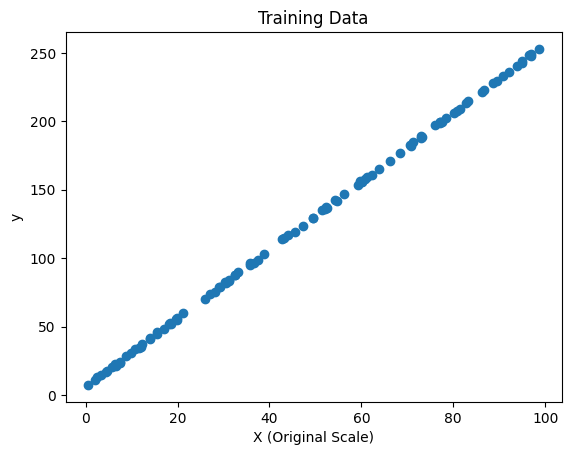

In [31]:
# VISUALIZE TRAINING DATA

# Plot original data points
plt.scatter(X_original, y)

# Add labels
plt.xlabel("X (Original Scale)")
plt.ylabel("y")

# Add title
plt.title("Training Data")

# Show plot
plt.show()


In [32]:
#INITIALIZE PARAMETERS

m = 0.0                     # Slope (weight)
b = 0.0                     # Intercept (bias)
learning_rate = 0.01        # Step size for gradient descent
epochs = 1000               # Number of training iterations
n = len(X)                  # Number of data points


In [33]:
#LOSS FUNCTION (MSE)

def mean_squared_error(y_true, y_pred):
    # Calculate average squared difference
    return np.mean((y_true - y_pred) ** 2)


In [34]:
# GRADIENT DESCENT TRAINING

losses = []   # Store loss at each epoch

for epoch in range(epochs):

    # Predict y using current m and b
    y_pred = m * X + b

    # Compute gradient of loss w.r.t slope
    dm = (-2 / n) * np.sum(X * (y - y_pred))

    # Compute gradient of loss w.r.t intercept
    db = (-2 / n) * np.sum(y - y_pred)

    # Update slope
    m -= learning_rate * dm

    # Update intercept
    b -= learning_rate * db

    # Calculate and store loss
    losses.append(mean_squared_error(y, y_pred))


In [38]:
# PRINT LEARNED PARAMETERS

print("Slope (m):", m)
print("Intercept (b):", b)


Slope (m): 73.97970591936826
Intercept (b): 123.54084908294715


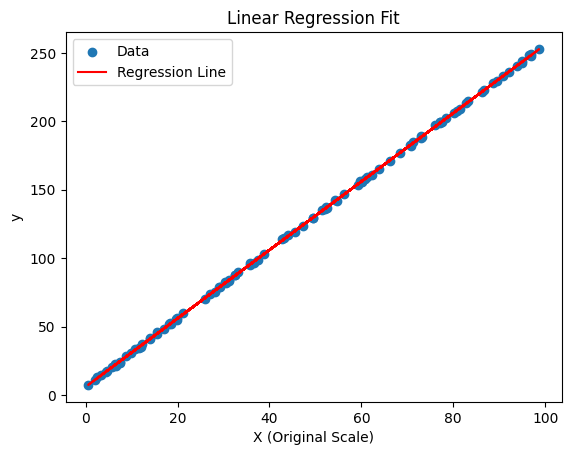

In [39]:
# PLOT REGRESSION LINE

# Plot original data points
plt.scatter(X_original, y, label="Data")

# Plot regression line (prediction uses scaled X)
plt.plot(
    X_original,
    m * X + b,
    color="red",
    label="Regression Line"
)

# Labels and title
plt.xlabel("X (Original Scale)")
plt.ylabel("y")
plt.title("Linear Regression Fit")

# Show legend
plt.legend()

# Display plot
plt.show()


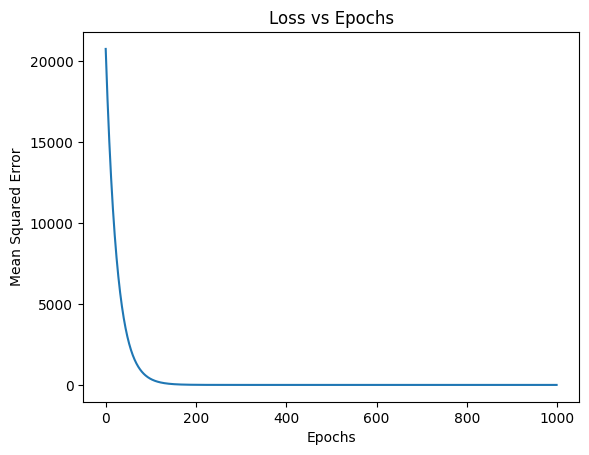

In [40]:
# LOSS VS EPOCHS

# Plot training loss
plt.plot(losses)

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss vs Epochs")

# Display plot
plt.show()


In [41]:
# PREDICTION FUNCTION (CORRECT)

def predict(x_new):
    """
    Predict output for new input value
    """
    # Scale new input using training mean & std
    x_scaled = (x_new - X_mean) / X_std

    # Apply learned equation
    return m * x_scaled + b


In [42]:
# TEST PREDICTION

# Predict y for X = 7
prediction = predict(np.array([[7]]))

print("Prediction for X = 7:", prediction)


Prediction for X = 7: [[23.52250084]]
